In [1]:
# # Run this and then restart the kernel at the start of each session to install
# # 'teotil3' in development mode
# !pip install -e /home/jovyan/projects/teotil3/

In [2]:
import os

import matplotlib.pyplot as plt
import nivapy3 as nivapy
import pandas as pd
import teotil3 as teo
from tqdm.notebook import tqdm

plt.style.use("ggplot")

In [3]:
eng = nivapy.da.connect_postgis()

Connection successful.


# TEOTIL3 
# Tutorial 03: Run the model and explore results

In [4]:
nve_data_year = 2023  # Usually best to use the most recent NVE data
admin_year = 2022  # Year to use for admin. boundaries (linking e.g. kommuner to reginer

# Model period
st_yr, end_yr = 2013, 2022

# Where to save data
data_fold = r"/home/jovyan/shared/common/FF/teotil3_data"

## 1. Create model input files

The code cell below only needs running once to create the model input files from the database (unless you change settings or input data, then you'll need to re-run to update the input files).

The code below takes about 40 seconds per model year.

In [5]:
# %%time

# # Generate model input files and save to disk
# years = range(st_yr, end_yr + 1)
# for year in tqdm(years):
#     gdf = teo.io.make_input_file(
#         year,
#         nve_data_year,
#         eng,
#         out_csv_fold=data_fold,
#         nan_to_vass=True,
#         add_offshore=True,
#         order_coastal=False,  # Recommend False, except for comparison with TEOTIL2
#         land_to_vass=True,  # Recommend True, except for comparison with TEOTIL2
#         agri_loss_model="annual",
#     )

## 2. Run the model

The code cell below runs the model with the input data created above. Results are also saved to disk, so you don't need to re-run this either, unless you change model parameters or modify the input files in some way.

In [6]:
# %%time

# # Run TEOTIL3
# years = range(st_yr, end_yr + 1)
# df_list = []
# for year in tqdm(years):
#     csv_path = os.path.join(
#         data_fold,
#         f"teotil3_input_data_nve{nve_data_year}_{year}.csv",
#     )
#     g = teo.model.run_model(
#         csv_path,
#         id_col="regine",
#         next_down_col="regine_down",
#         totals_from_subfracs=True,
#     )
#     res_df = teo.model.model_to_dataframe(
#         g, id_col="regine", next_down_col="regine_down"
#     )
#     res_df["year"] = year
#     df_list.append(res_df)
# mod_df = pd.concat(df_list, axis="rows")

# mod_csv = os.path.join(
#     data_fold, f"teo3_results_nve{nve_data_year}_{st_yr}-{end_yr}.csv"
# )
# mod_df.to_csv(mod_csv, index=False)

## 3. Read saved data

In [7]:
# Read saved data for speed
mod_csv = os.path.join(
    data_fold, f"teo3_results_nve{nve_data_year}_{st_yr}-{end_yr}.csv"
)
mod_df = pd.read_csv(mod_csv)
mod_df.head()

,regine,regine_down,accum_agriculture-background_din_kg,accum_agriculture-background_ss_kg,accum_agriculture-background_tdp_kg,accum_agriculture-background_toc_kg,accum_agriculture-background_ton_kg,accum_agriculture-background_totn_kg,accum_agriculture-background_totp_kg,accum_agriculture-background_tpp_kg,...,local_urban_tpp_kg,local_wood_din_kg,local_wood_ss_kg,local_wood_tdp_kg,local_wood_toc_kg,local_wood_ton_kg,local_wood_totn_kg,local_wood_totp_kg,local_wood_tpp_kg,year
0,001.10,001.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,36.1,849.2,0.6,9938.9,186.2,222.3,5.4,4.8,2013
1,001.1A2B,001.1A2A,123.574401,0.752367,3.420677,6341.957239,68.505729,192.080130,3.609359,0.188682,...,5.6,1318.1,29798.4,23.9,384175.8,7138.8,8456.9,210.0,186.1,2013
2,001.1A4D,001.1A4C,15.917595,0.289332,0.117126,464.712746,6.729665,22.647261,0.149627,0.032501,...,0.0,237.2,5272.5,4.3,70016.3,1296.4,1533.6,38.2,33.9,2013
3,001.1M,001.1L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,473.5,11104.0,8.8,142788.5,2641.6,3115.1,78.3,69.5,2013
4,001.21,001.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,5.0,117.0,0.1,1386.1,25.9,30.9,0.8,0.7,2013


In [8]:
# Build catchment network for visualisation
reg_gdf = teo.io.get_regine_geodataframe(eng, admin_year)
csv_path = os.path.join(
    data_fold,
    f"teotil3_input_data_nve{nve_data_year}_{st_yr}.csv",
)
in_df = pd.read_csv(csv_path)
g = teo.model.build_graph(in_df, id_col="regine", next_down_col="regine_down")

## 4. Explore results 

### 4.1. Choose regine of interest

In [9]:
# Set regine of interest
reg_id = "003.B1B"

### 4.2. Visualise catchment network

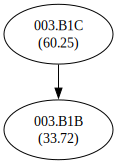

In [10]:
# Plot network upstream
teo.vis.plot_network(g, reg_id, direct="up", stat="local", quant="a_cat_land_km2")

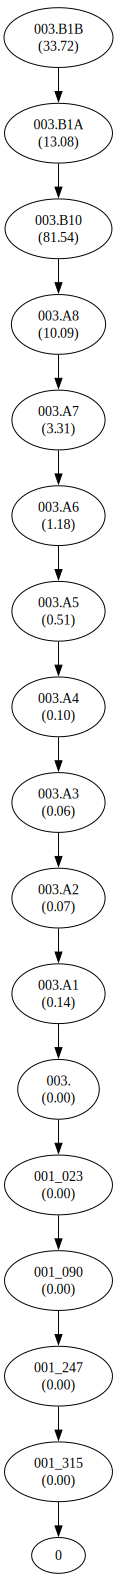

In [11]:
# Plot network downstream
teo.vis.plot_network(g, reg_id, direct="down", stat="local", quant="a_cat_land_km2")

<Axes: >

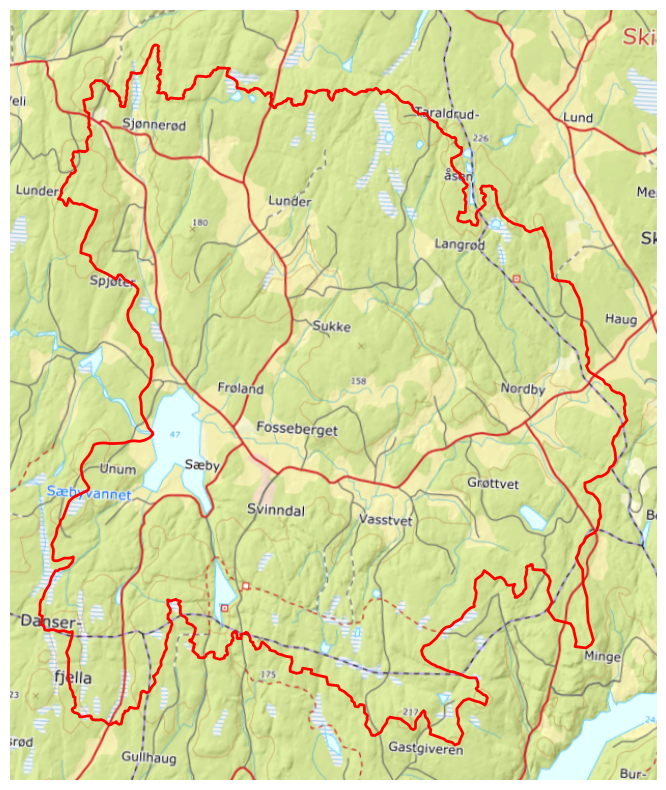

In [12]:
# Plot the specified regine and all contributing regines upstream
gdf, ax = teo.vis.plot_catchment(
    g, reg_id, reg_gdf, id_col="regine", include_connected=True, direct="up"
)
ax

### 4.3. Explore input data for vassdragsområde

The code cell below creates an interactive map for the whole vassdragsområde containing the regine of interest. Note that this can take a while for large vassdragsområder! You can also filter to make `regine_list` shorter

In [13]:
# Choose data to plot
plot_year = 2022  # Year to visualise
plot_par = "totn"  # ['totn', 'din', 'ton', 'totp', 'tdp', 'tpp', 'toc', 'ss']

In [14]:
# Create map
vassom = reg_id.split(".")[0]
vass_gdf = reg_gdf[reg_gdf["regine"].str.startswith(vassom)].copy()
regine_list = vass_gdf["regine"].tolist()
model_input_file = os.path.join(
    data_fold, f"teotil3_input_data_nve{nve_data_year}_{plot_year}.csv"
)
teo.vis.input_data_summary_map(
    model_input_file, regine_list, plot_year, eng, par=plot_par
)

### 4.4. Simulated fluxes

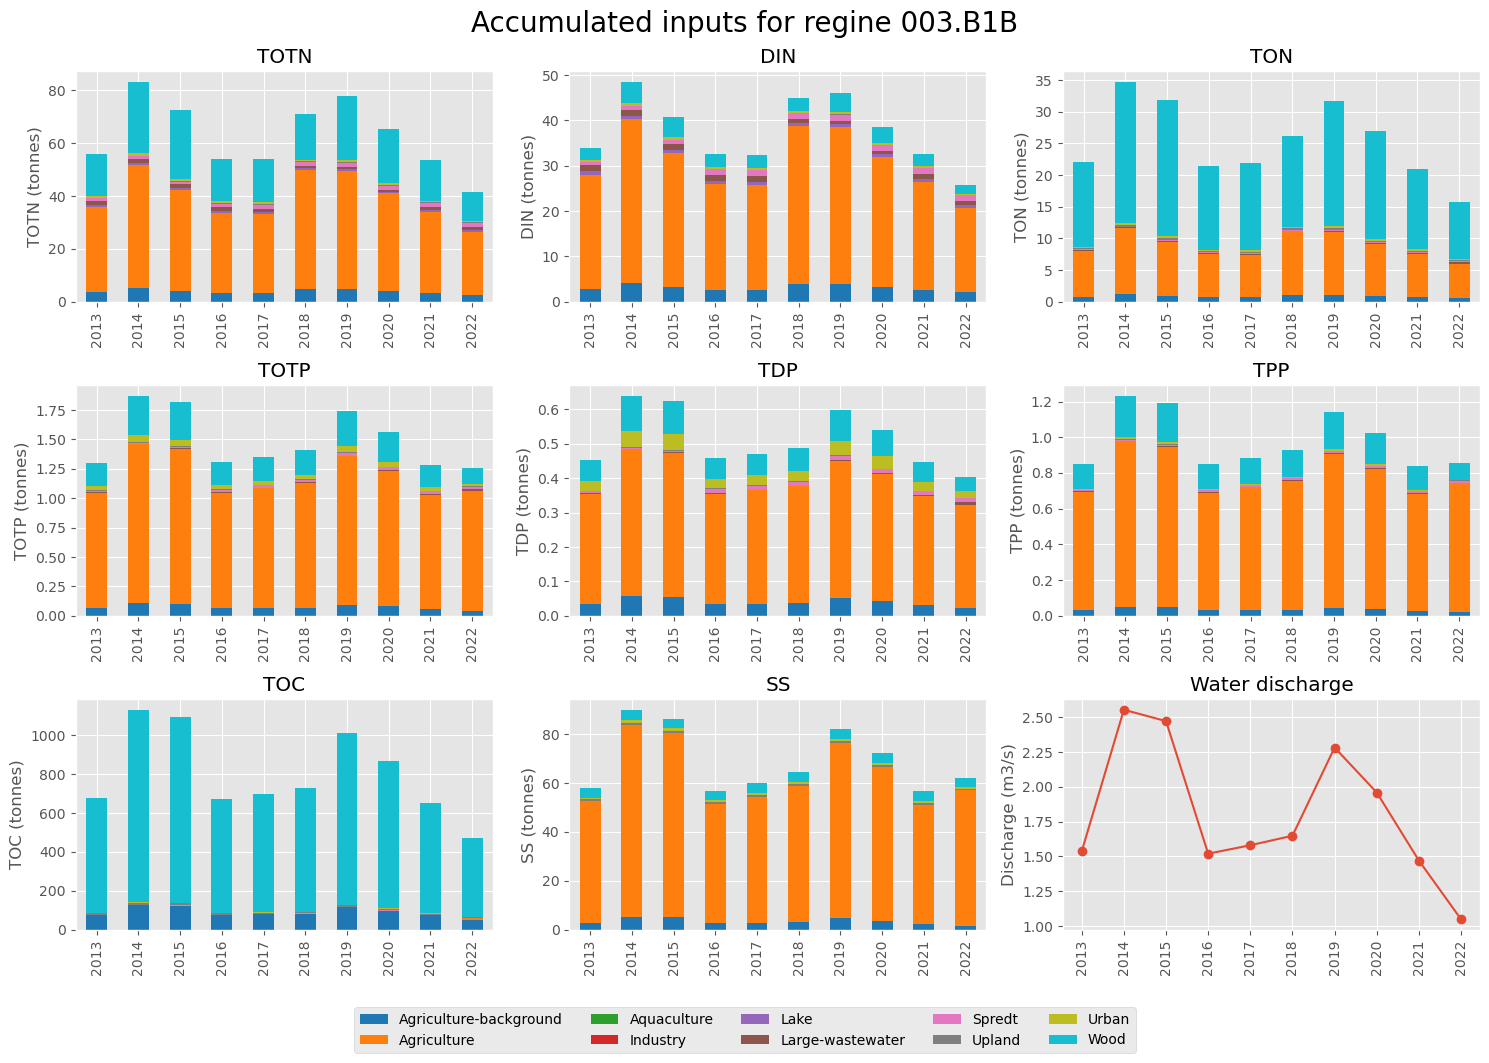

In [15]:
# Bar charts for each parameter
axes = teo.vis.plot_regine_barchart(reg_id, mod_df, stat="accum", index_col="year")

### 4.5. Avlastningsbehov

In [16]:
# Parameter of interest
par = "TOTP"

# Target concentration in ug/l
ges_conc = 16

# Define base period against which reductions should be calculated
av_st_yr, av_end_yr = 2017, 2022

In [17]:
res_dict = teo.model.get_avlastningsbehov(
    reg_id, par, ges_conc, mod_df, st_yr=av_st_yr, end_yr=av_end_yr, index_col="year"
)

Selected regine:	003.B1B.
Selected parameter:	TOTP.
Time period:		2017 to 2022.
Concentration for GES:	16 ug/l.

The regine contains 1 lake(s):
	vatnLnrs:	[295]

Estimated mean outflow concentration(s) (2017-2022):
	TOTP (ug/l)                         28.3
	TDP (ug/l)                           9.6
	TPP (ug/l)                          18.6

Estimated mean annual outflow flux(es) (2017-2022):
	TOTP (kg)                           1437
	TDP (kg)                             492
	TPP (kg)                             945

Source apportionment for outflow TOTP:
	Agriculture (%)                     75.3
	Wood (%)                            15.1
	Agriculture-background (%)           4.8
	Urban (%)                            2.6
	Spredt (%)                           1.6
	Large-wastewater (%)                 0.4
	Upland (%)                           0.3

Maximum outflow flux for GES (kg/yr)	     841
Transmission factor (weighted) for TOTP     0.52
Maximum inflow flux for GES (kg/yr)	    1607
Estim